In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as p
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as TF 
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, RidgeClassifier, ElasticNet
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.io as spio
import scipy.sparse.linalg as ll
import os
import pandas as pd
from sklearn.decomposition import PCA

Load dataset

In [2]:
reco = pd.read_csv("C:/Users/Ameyaveer Singh/OneDrive/Desktop/Machine learning/ML Project/ML project datasets/Music Reco.csv")

Inspect dataset

In [3]:
reco.info()
reco.isnull().sum() #Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  int64 

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      2
most_playedon       0
dtype: int64

Filling missing values with mean

In [4]:
reco['EnergyLiveness'].fillna(reco['EnergyLiveness'].mean(), inplace=True)
reco.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      0
most_playedon       0
dtype: int64

In [5]:
reco.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,TRUE,TRUE,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,TRUE,TRUE,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,TRUE,TRUE,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,TRUE,TRUE,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,TRUE,TRUE,617259738,9.942693,Youtube


## EDA

Making a copy of the dataset for EDA

In [8]:
reco_copy = reco.copy()

EDA of dependent variable - Stream

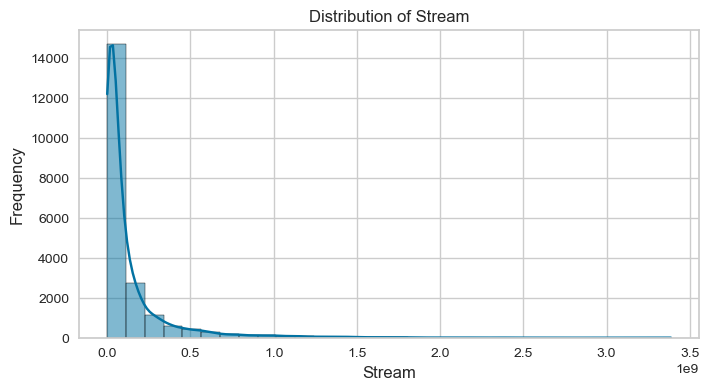

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(reco_copy['Stream'], bins=30, kde=True)
plt.title('Distribution of Stream')
plt.xlabel('Stream')
plt.ylabel('Frequency')
plt.show()

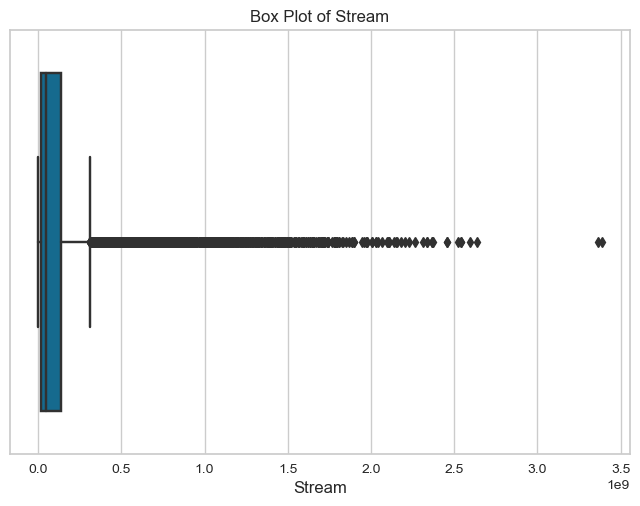

In [8]:
sns.boxplot(x=reco_copy['Stream'])
plt.title('Box Plot of Stream')
plt.xlabel('Stream')
plt.show()

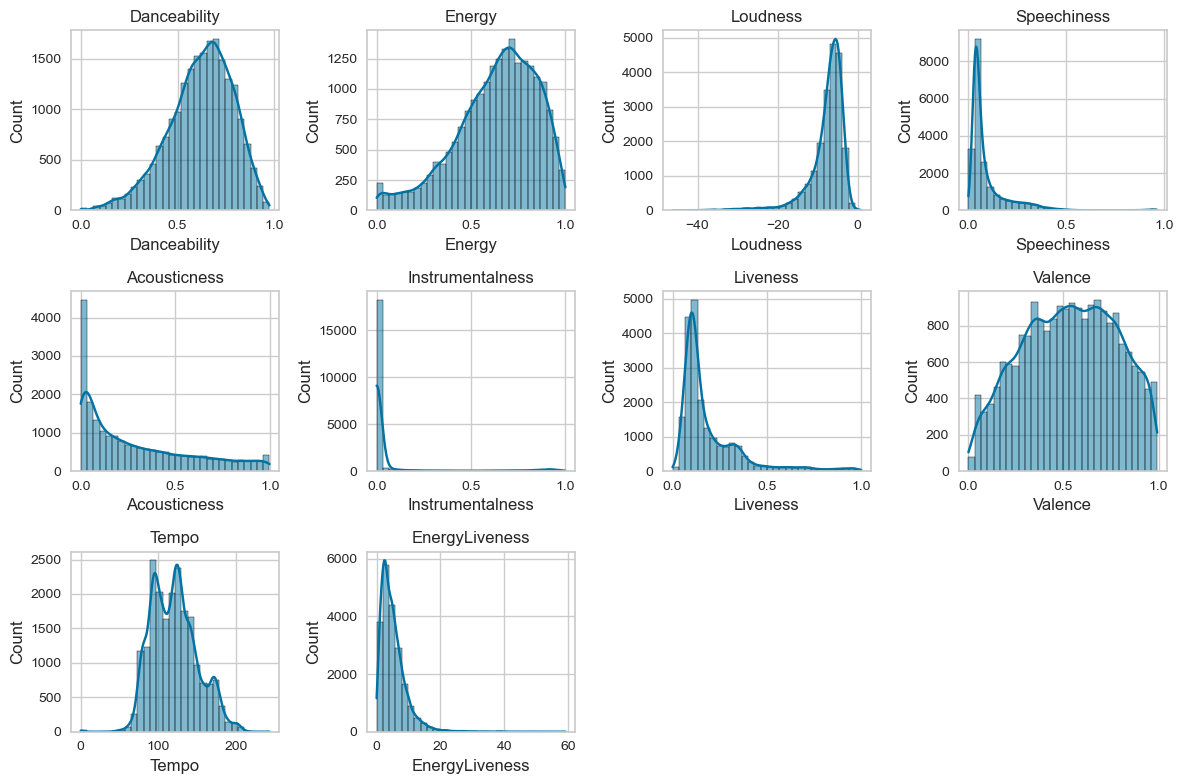

In [9]:
selected_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
                    'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'EnergyLiveness']

# Plot histograms for selected columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(reco_copy[column], bins=30, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

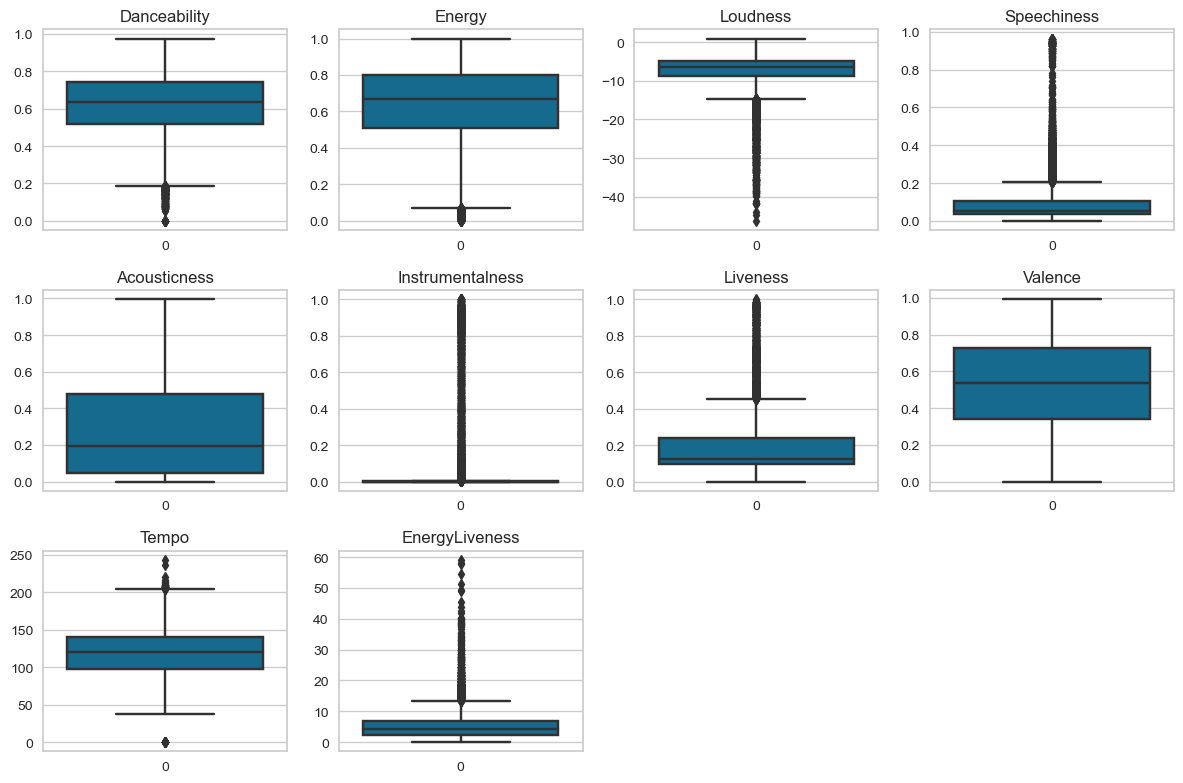

In [10]:
selected_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
                    'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'EnergyLiveness']

plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(reco_copy[column])
    plt.title(column)

plt.tight_layout()
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

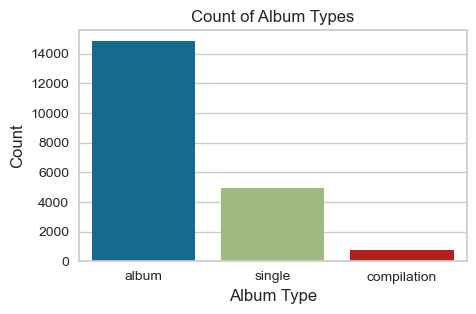

In [11]:
plt.figure(figsize=(5, 3))
sns.countplot(x=reco_copy['Album_type'])
plt.title('Count of Album Types')
plt.xlabel('Album Type')
plt.ylabel('Count')
plt.show()

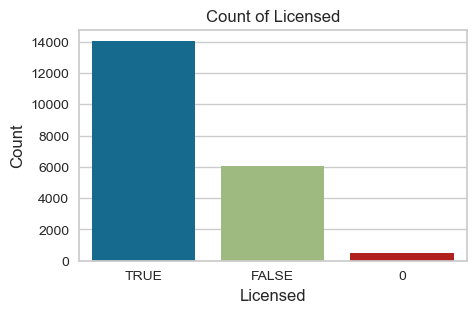

In [12]:
plt.figure(figsize=(5, 3))
sns.countplot(x=reco_copy['Licensed'])
plt.title('Count of Licensed')
plt.xlabel('Licensed')
plt.ylabel('Count')
plt.show()

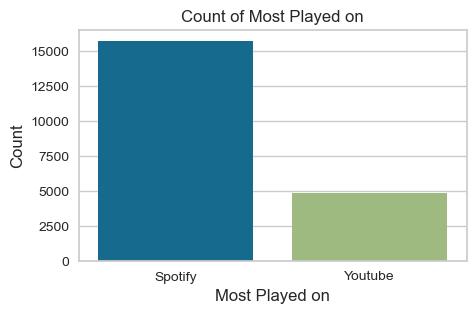

In [13]:
plt.figure(figsize=(5, 3))
sns.countplot(x=reco_copy['most_playedon'])
plt.title('Count of Most Played on')
plt.xlabel('Most Played on')
plt.ylabel('Count')
plt.show()

In [9]:
# Dropping non-meaningfull variables: Artist, Track, Album, Title, Channel
reco_copy.drop(columns=['Artist', 'Track', 'Album','Title'],axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
reco_copy['Album_type'] = label_encoder.fit_transform(reco_copy['Album_type'])
reco_copy['Licensed'] = label_encoder.fit_transform(reco_copy['Licensed'])
reco_copy['most_playedon'] = label_encoder.fit_transform(reco_copy['most_playedon'])
reco_copy['official_video'] = label_encoder.fit_transform(reco_copy['official_video'])
reco_copy['Channel'] = label_encoder.fit_transform(reco_copy['Channel'])

In [11]:
reco_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Album_type        20594 non-null  int32  
 1   Danceability      20594 non-null  float64
 2   Energy            20594 non-null  float64
 3   Loudness          20594 non-null  float64
 4   Speechiness       20594 non-null  float64
 5   Acousticness      20594 non-null  float64
 6   Instrumentalness  20594 non-null  float64
 7   Liveness          20594 non-null  float64
 8   Valence           20594 non-null  float64
 9   Tempo             20594 non-null  float64
 10  Duration_min      20594 non-null  float64
 11  Channel           20594 non-null  int32  
 12  Views             20594 non-null  int64  
 13  Likes             20594 non-null  int64  
 14  Comments          20594 non-null  int64  
 15  Licensed          20594 non-null  int32  
 16  official_video    20594 non-null  int32 

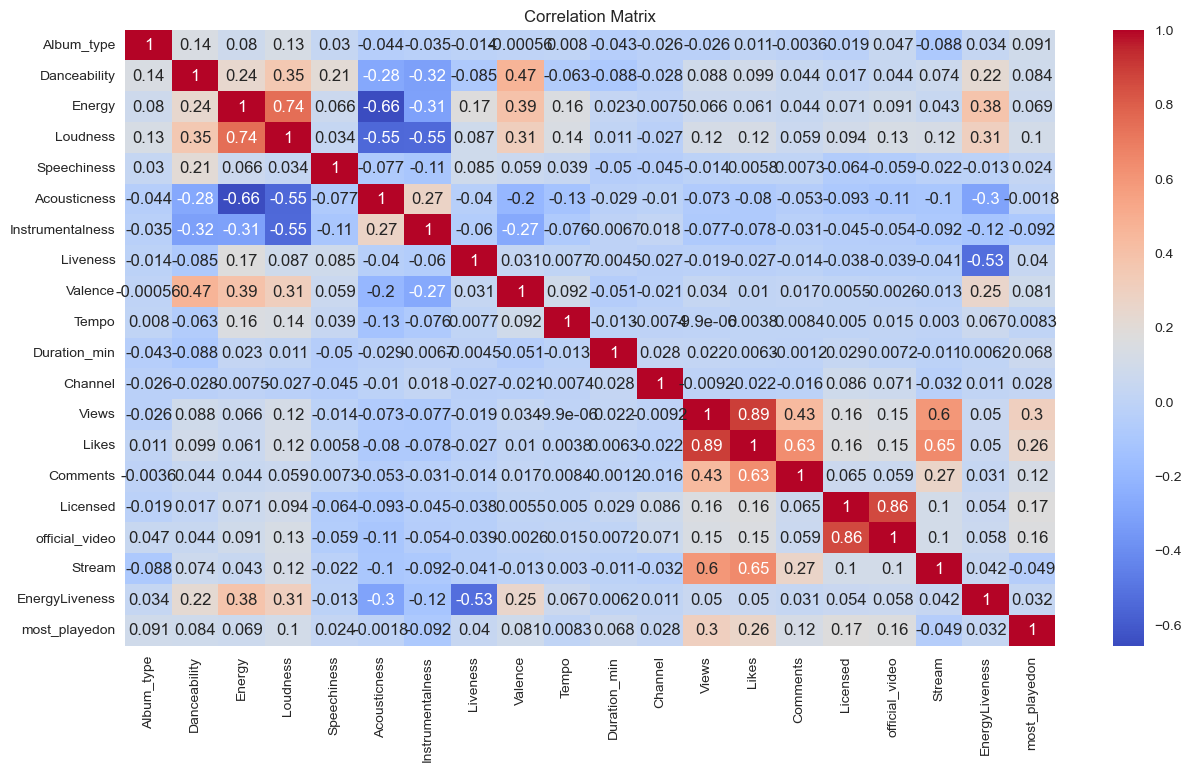

In [13]:
# Compute the correlation matrix
corr_matrix = reco_copy.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize =(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Lot of varibales have outliers, Views and likes are highly correlated, licensed and offical video has highly correlated. So, PCA will be applied on the dataset to reduce dimensions, eliminate noise or outliers in the data and to reduce correlation between variables. 

### PCA

In [12]:
std_scaler = p.StandardScaler()
reco_std = std_scaler.fit_transform(reco_copy)
reco_std.shape

(20594, 20)

In [13]:
## Run PCA and print variances explained
reco_pca = PCA(n_components=3, random_state=23) #using 3 cols out of 11
reco_pca.fit(reco_std) 
print(reco_pca.explained_variance_ratio_)
print(reco_pca.singular_values_)

[0.17948633 0.13484772 0.0902712 ]
[271.89488425 235.67154907 192.82349652]


The variance shows that, PCA_1, PCA_2 retain good amount of data from the original dataset and, PCA_3 retains the least amount of information. 
The eigenvalues show that PCA_1 captures the maximum amount of data followed by PCA_2 and PCA_3. 

In [15]:
data_reduced = PCA(n_components=3, random_state=23).fit_transform(reco_std) 
data_reduced.shape # only 3 cols now    

data_reduced_df = pd.DataFrame(data_reduced, columns=['PCA_1', 'PCA_2', 'PCA_3'])
data_reduced_df['Stream'] = reco_copy['Stream']
data_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   20594 non-null  float64
 1   PCA_2   20594 non-null  float64
 2   PCA_3   20594 non-null  float64
 3   Stream  20594 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 643.7 KB


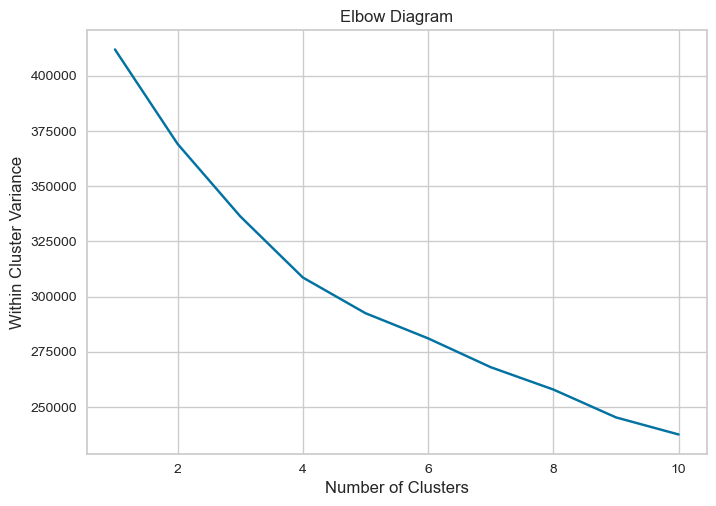

In [18]:
max_clust = 10 # Start from 2
num_clust = np.arange(1,max_clust+1,1)
wss = np.zeros(max_clust)
for i in range(max_clust):
    cnum = num_clust[i]
    kmeans = KMeans(init="random", n_clusters=cnum, n_init=3, random_state=0).fit(reco_std)
    wss[i] = kmeans.inertia_

fig = plt.figure()
plt.title("Elbow Diagram")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Variance")
plt.plot(num_clust, wss)

Optimal value of K = 4

In [19]:
cno = 4
kmeans = KMeans(init="random", n_clusters=cno, n_init=20, random_state=0).fit(data_reduced)
labels_ = kmeans.labels_
wss = kmeans.inertia_
print("WSS = ", wss) 

WSS =  65491.7641104129


Silhouette score = 0.44749556779447036


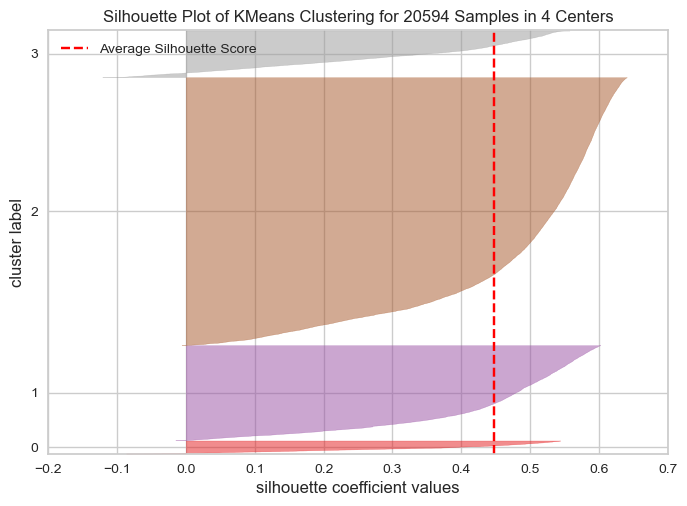

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20594 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
labels = kmeans.labels_
score = silhouette_score(data_reduced, labels, metric='euclidean')
print("Silhouette score = {}".format(score))

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(data_reduced)
visualizer.show()

In [20]:
data_reduced_df["Cluster_id"] = kmeans.labels_
data_reduced_df

,PCA_1,PCA_2,PCA_3,Stream,Cluster_id
0,3.622649,3.169030,1.682553,1040234854,1
1,1.760555,-0.481894,-0.543845,310083733,3
2,1.341790,-1.264454,-0.850183,63063467,3
3,1.229205,0.773058,-0.504996,434663559,3
4,3.400161,2.955323,0.408785,617259738,1
...,...,...,...,...,...
20589,0.656715,-1.081659,-1.173012,9227144,3
20590,1.696356,-1.858696,-1.082208,10898176,3
20591,0.572505,-1.044665,-1.221055,6226110,3
20592,0.426151,-1.100877,-0.743106,6873961,3


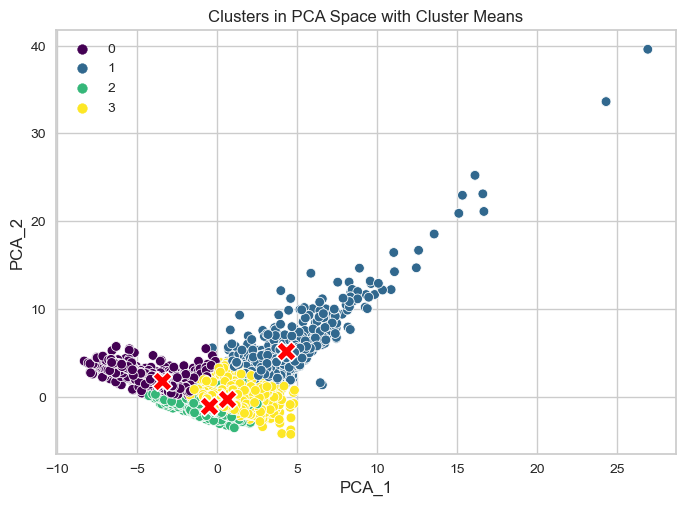

In [21]:
cluster_means = data_reduced_df.groupby('Cluster_id').mean()

sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster_id', data=data_reduced_df, palette='viridis')
sns.scatterplot(x=cluster_means['PCA_1'], y=cluster_means['PCA_2'], marker='X', s=200, color='red')
plt.title('Clusters in PCA Space with Cluster Means')
plt.show()


K-means on the reduced data reveals distinct and viable clusters, although there is some observed overlap among data points in clusters 2 and 3. Cluster 0 exhibits dispersed data points, while clusters 1, 2, and 3 display compact arrangements, closely situated to one another. Moreover, a silhouette score of 0.447 indicates that the clusters are reasonably well-defined, with evident separation between them.

Examining the silhouette plot, it becomes apparent that none of the clusters fall below the average score, reinforcing the overall clarity of cluster distinctions. Additionally, the clusters vary in size, as reflected in the plot, highlighting the diverse nature of the identified clusters.

Maping the cluster id to the original dataset

In [22]:
reco_copy["Cluster_id"] = kmeans.labels_
reco_copy

,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster_id
0,0,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,...,1997,693555221,6220896,169907,2,2,1040234854,1.150082,0,1
1,0,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,...,1997,72011645,1079128,31003,2,2,310083733,15.183585,0,3
2,2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,...,1997,8435055,282142,7399,2,2,63063467,7.956897,0,3
3,0,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,...,1997,211754952,1788577,55229,2,2,434663559,11.546875,0,3
4,0,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,...,1997,618480958,6197318,155930,2,2,617259738,9.942693,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20589,2,0.582,0.926,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,...,4508,71678,1113,0,2,2,9227144,11.036949,0,3
20590,2,0.531,0.936,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,...,4508,164741,2019,0,2,2,10898176,10.140845,0,3
20591,2,0.443,0.830,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,...,4508,35646,329,0,2,2,6226110,5.389610,0,3
20592,2,0.417,0.767,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,...,4508,6533,88,0,2,2,6873961,7.101852,0,3


In [24]:
functions = {
    'Cluster_id': ['count'],
    'Danceability': ['mean', 'median', 'min', 'max'],
    'Energy': ['mean', 'median', 'min', 'max'],
    'Loudness': ['mean', 'median', 'min', 'max'],
    'Speechiness': ['mean', 'median', 'min', 'max'],
    'Acousticness': ['mean', 'median', 'min', 'max'],
    'Instrumentalness': ['mean', 'median', 'min', 'max'],
    'Liveness': ['mean', 'median', 'min', 'max'],
    'Valence': ['mean', 'median', 'min', 'max'],
    'Tempo': ['mean', 'median', 'min', 'max'],
    'Views': ['mean', 'median', 'min', 'max'],
    'Likes': ['mean', 'median', 'min', 'max'],
    'Comments': ['mean', 'median', 'min', 'max'],
    'Licensed': ['mean', 'median','min', 'max'],
    'official_video': ['mean', 'median', 'min', 'max'],
    'Stream': ['mean', 'median'],
    'EnergyLiveness': ['mean', 'median', 'min', 'max'],
    'most_playedon': ['mean', 'median','min', 'max'],
}

# Group by 'Cluster_id' and calculate the aggregations
cluster_statistics = reco_copy.groupby('Cluster_id').agg(functions)
cluster_statistics.reset_index(inplace=True)

# Display the result
print(cluster_statistics)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


  Cluster_id        Danceability                         Energy         \
              count         mean  median   min    max      mean median   
0          0   2284     0.417525  0.4220  0.00  0.902  0.247203  0.245   
1          1    674     0.683693  0.7075  0.19  0.965  0.683225  0.705   
2          2   4749     0.644968  0.6560  0.00  0.975  0.654361  0.663   
3          3  12887     0.643516  0.6550  0.14  0.975  0.694355  0.703   

                   Loudness                         Speechiness           \
      min    max       mean   median     min    max        mean   median   
0  0.0000  1.000 -16.335058 -14.2965 -46.251  0.000    0.048067  0.03750   
1  0.0739  0.989  -5.686856  -5.3085 -18.064 -1.190    0.093578  0.05865   
2  0.0000  0.995  -7.366727  -6.8100 -24.799  0.522    0.127341  0.06000   
3  0.1550  0.998  -6.362936  -6.0050 -22.334  0.920    0.094244  0.05340   

                 Acousticness                         Instrumentalness  \
      min    max        

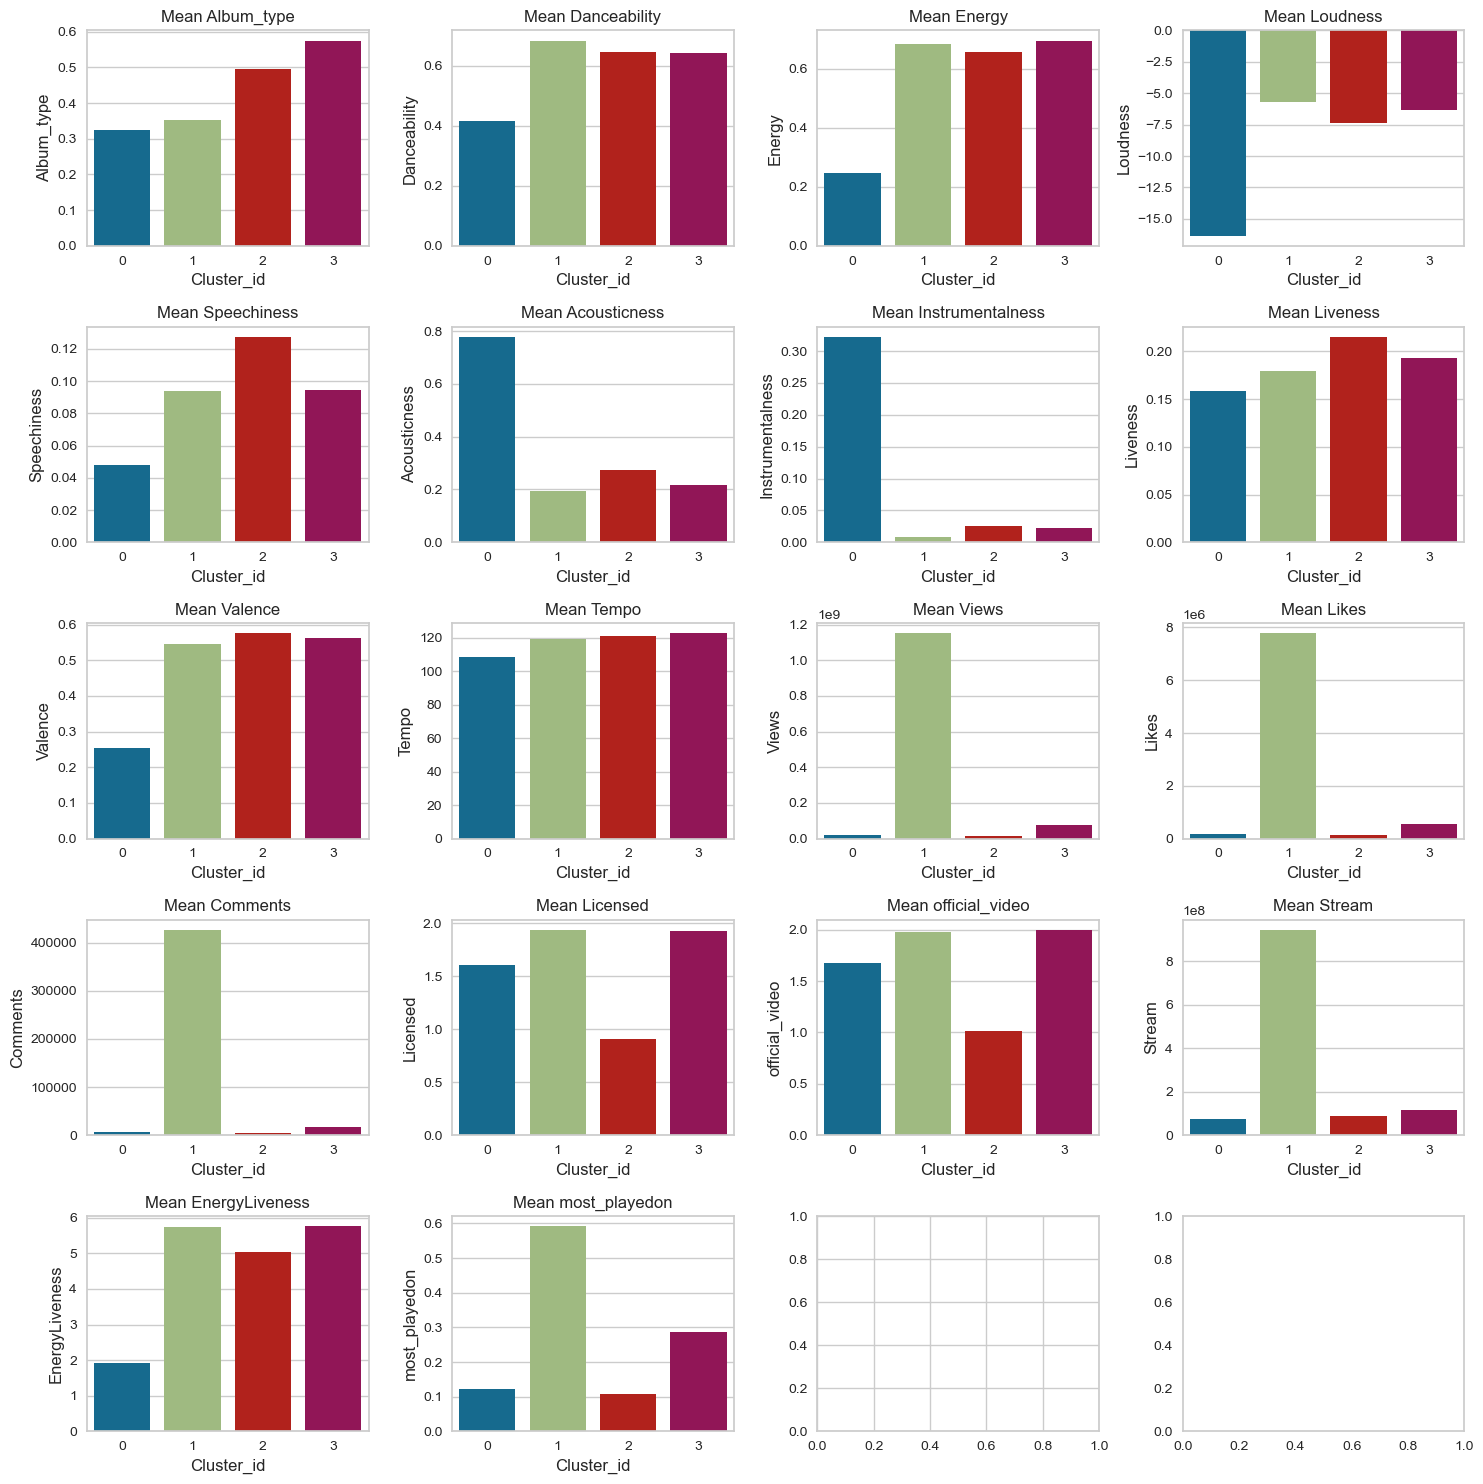

In [25]:
variables = ['Album_type', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream', 'EnergyLiveness', 'most_playedon']

# Number of clusters
num_clusters = reco_copy['Cluster_id'].nunique()

# Define the number of rows and columns in the grid
num_rows = 5 
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()
plt.grid(False)
# Loop through variables and create subplots
for i, variable in enumerate(variables):
    sns.barplot(x="Cluster_id", y=variable, data=reco_copy, estimator='mean', ci=None, ax=axes[i])
    axes[i].set_title(f'Mean {variable}')
plt.tight_layout()
plt.show()


##### Cluster 0: "Energetic Hits"
Smallest cluster with the least datapoints. 
High average danceability, indicating energetic and dance-friendly songs.
High average energy, suggesting lively and intense songs.
Highest average loudness, indicating sonically powerful songs.
Lowest average instrumentalness, suggesting a higher presence of vocals and lyrics.
Relatively high average valence, indicating a positive and cheerful mood.
Higher average tempo, suggesting a faster pace.
Highest average views, indicating higher popularity or exposure.
Highest average likes, indicating a higher level of audience appreciation.
Highest average stream count, suggesting a higher level of online streaming.
Highest average energy liveness, combining high energy and liveness.
Most played on a platform, indicating higher visibility.
Highest average presence of official videos.

This cluster is characterized by songs with high danceability, energy, loudness, popularity and has the highest streams on youtube. The presence of official videos and high engagement suggests these are energetic hits with broad appeal.

###### Cluster 1: "Versatile Melodies"
Medium size cluster. 
Moderate average danceability.
Moderate average energy.
Moderate average loudness.
Highest average speechiness, indicating a higher presence of spoken words or lyrics.
Highest average valence, indicating a positive and cheerful mood.
Higher average tempo.
Moderate average likes.
Moderate average comments.
Moderate average licensed.
Moderate average presence of official videos.
Least likely to be most played on a platform

This cluster features songs with moderate energy, speechiness, and valence. While not as energetic as Cluster 0, these songs are versatile, with a mix of characteristics that make them suitable for various preferences. These songs are poplular on spotify. 

##### Cluster 2: "Dynamic Trendsetters"
Biggest cluster with the most datapoints. 
Moderate average danceability.
Highest average energy.
Moderate average loudness.
Moderate average speechiness.
Moderate average acousticness.
Moderate average liveness.
Moderate average valence.
Highest average tempo.
Moderate average views.
Moderate average likes.
Highest average comments, indicating a higher level of engagement or discussion.
Highest average licensed, suggesting a higher likelihood of being used in commercial or licensed contexts.
Highest average presence of official videos.
Moderate average stream count.
Highest average energy liveness, combining high energy and liveness.
Moderate likelihood of being most played on a platform.

Songs in this cluster exhibit high energy, tempo, and engagement. They are likely to be dynamic, trendsetting tracks that are commercially successful and have a strong online presence.

##### Cluster 3: "Acoustic Live Vibes"
Medium size cluster.
Low average danceability.
Lowest average energy.
Lowest average loudness.
Lowest average speechiness.
Highest average acousticness.
Highest average instrumentalness.
Highest average liveness, suggesting a higher likelihood of being recorded in front of a live audience.
Lowest average valence.
Lower average tempo.
Moderate average views.
Moderate average likes.
Moderate average comments.
Moderate average licensed.
Moderate average presence of official videos.
Moderate average stream count.
Moderate average energy liveness.
Least likely to be most played on a platform.

This cluster includes songs with lower energy, acoustic elements, and a higher likelihood of being recorded live. The lower valence suggests a more subdued and potentially intimate vibe.

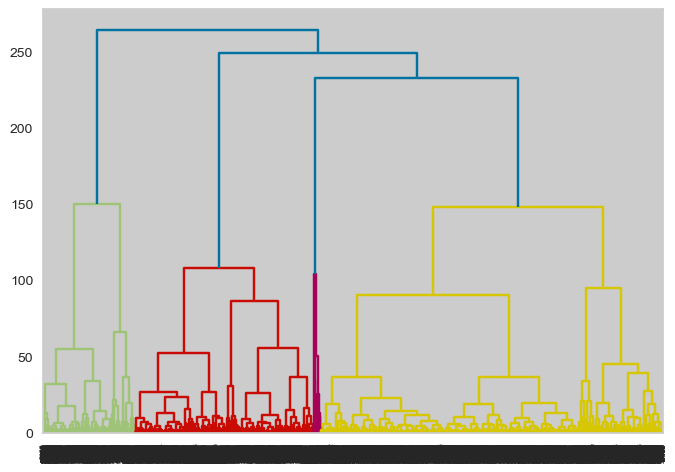

In [30]:
# Perform hierarchical clustering with ward
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels_hierarchical = hierarchical_cluster.fit_predict(data_reduced)

#Dendrogram
linkage_data = linkage(data_reduced, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [31]:
score = silhouette_score(data_reduced, labels_hierarchical, metric='euclidean')
print("Silhouette score = {}".format(score))


Silhouette score = 0.3844086118110438


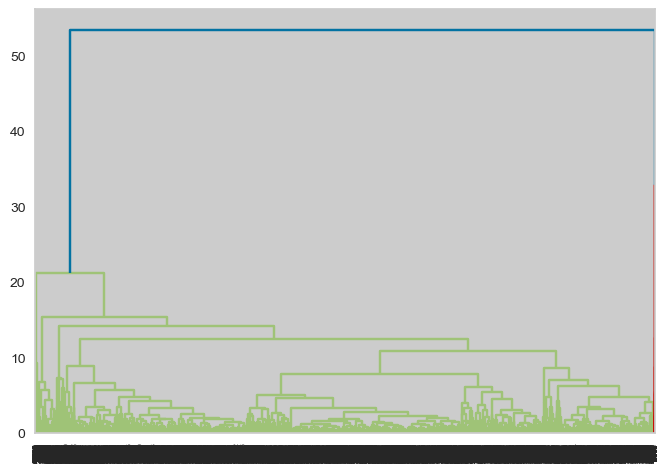

In [29]:
hierarchical_cluster_2 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
labels_2 = hierarchical_cluster_2.fit_predict(data_reduced)

#Dendrogram
linkage_data_2 = linkage(data_reduced, method='complete', metric='euclidean')
dendrogram(linkage_data_2)
plt.show()

In [32]:
score = silhouette_score(data_reduced, labels_2, metric='euclidean')
print("Silhouette score = {}".format(score))

Silhouette score = 0.7470059346377506


Kmeans has a silhouette score of  0.44, hierarchical clustering using ward method showed a score of 0.38 and, hierarchical clustering using complete method showed a score of 0.74.

Ward linkage method shows that the distances between clusters are greater compared to the complete method. There are 4 distinct clusters, aligning with the results obtained from KMeans. The larger distances between clusters might indicate that the Ward method is emphasizing variance between clusters, resulting in more spread-out clusters.

Complete linkage method, despite having a high silhouette score of 0.74, has formed a dominant cluster that contains a large portion of the data. This could be due to the method's tendency to form compact clusters.



## Supervised Machine Learning Models

In [16]:
reco_features = data_reduced_df.iloc[:,0:3] 
reco_labels = data_reduced_df['Stream'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(reco_features, reco_labels, test_size = 0.20, random_state = 23)

#### Linear Regression with reduced data (PCA)

Intercept: 133049211.89630179
Coefficients: [55857978.39170916 84877216.2518266  42277580.14114357]
Mean Squared Error: 2.7774873640314416e+16
R-squared: 55.05380479780153 %


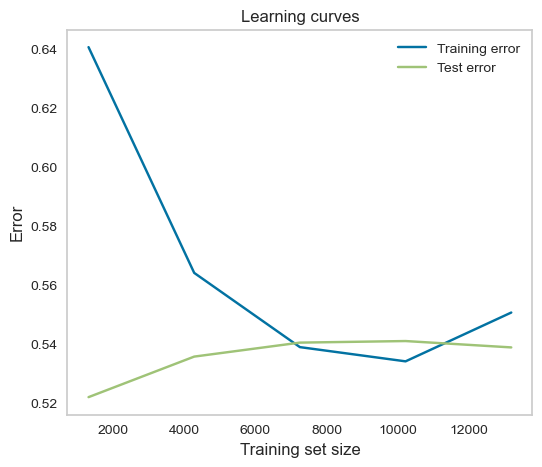

In [25]:
LINregressor = LinearRegression() 
LinRegmodel = LINregressor.fit(X_train, y_train)
LinRegpreds = LinRegmodel.predict(X_test)
LinRegmodel.intercept_
LinRegmodel.coef_
mean_squared_error(y_test, LinRegpreds)
r_sq_lin = LinRegmodel.score(X_train, y_train)

print("Intercept:", LinRegmodel.intercept_)
print("Coefficients:", LinRegmodel.coef_)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, LinRegpreds)
print("Mean Squared Error:", mse)

# Calculate and print R-squared on the training set
r_sq_lin = LinRegmodel.score(X_train, y_train) * 100
print("R-squared:", r_sq_lin, "%")

estimator = LinearRegression()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

The training error decreases initially but then starts to increase, and at the same time, the test error also increases, it may indicate that the model is overfitting the training data.

Dropping non-meaningfull variables: Artist, Track, Album, Title, Channel 
Dropping variables that showed the same trend/similar to the dependent variable: Views, Likes, Comments


In [18]:
reco.drop(columns=['Artist', 'Track', 'Album','Title','Views'],axis=1,inplace=True)

In [19]:
label_encoder = LabelEncoder()
reco['Album_type'] = label_encoder.fit_transform(reco['Album_type'])
reco['Licensed'] = label_encoder.fit_transform(reco['Licensed'])
reco['most_playedon'] = label_encoder.fit_transform(reco['most_playedon'])
reco['official_video'] = label_encoder.fit_transform(reco['official_video'])
reco['Channel'] = label_encoder.fit_transform(reco['Channel'])

In [20]:
# Moving 'Stream' to last place
col = reco.pop('Stream')
reco.insert(18, col.name, col)
reco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Album_type        20594 non-null  int32  
 1   Danceability      20594 non-null  float64
 2   Energy            20594 non-null  float64
 3   Loudness          20594 non-null  float64
 4   Speechiness       20594 non-null  float64
 5   Acousticness      20594 non-null  float64
 6   Instrumentalness  20594 non-null  float64
 7   Liveness          20594 non-null  float64
 8   Valence           20594 non-null  float64
 9   Tempo             20594 non-null  float64
 10  Duration_min      20594 non-null  float64
 11  Channel           20594 non-null  int32  
 12  Likes             20594 non-null  int64  
 13  Comments          20594 non-null  int64  
 14  Licensed          20594 non-null  int32  
 15  official_video    20594 non-null  int32  
 16  EnergyLiveness    20594 non-null  float6

In [21]:
reco_features_1 = reco.iloc[:,0:18] 
reco_labels_1 = reco['Stream'] 

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(reco_features_1, reco_labels_1, test_size = 0.20, random_state = 23)

#### Linear Regression with original dataset

Intercept: 203269892.16181433
Coefficients: [-2.46908756e+07  1.51398028e+07 -6.97104819e+07  3.91226688e+06
 -4.97929455e+07 -4.23932555e+07 -3.54721209e+07 -1.20858556e+07
 -2.15404261e+07 -2.42126315e+04 -9.36376845e+05 -1.91138445e+03
  1.21749532e+02 -4.67218966e+02  7.38035073e+05  1.05057739e+07
 -4.15929675e+05 -1.33240427e+08]
Mean Squared Error: 3.018550484969293e+16
R-squared: 52.2466236839371 %


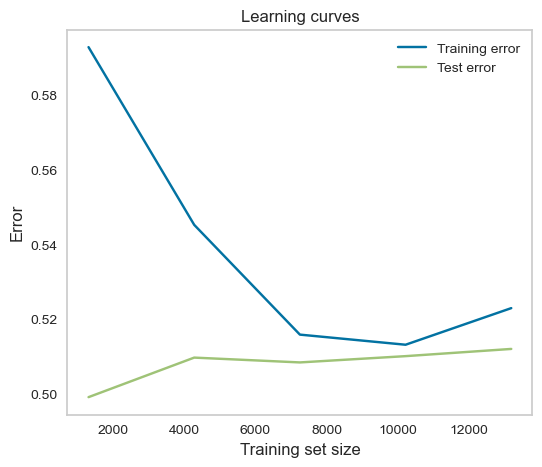

In [39]:
LINregressor = LinearRegression() 
LinRegmodel = LINregressor.fit(X_train1, y_train1)
LinRegpreds = LinRegmodel.predict(X_test1)

print("Intercept:", LinRegmodel.intercept_)
print("Coefficients:", LinRegmodel.coef_)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test1, LinRegpreds)
print("Mean Squared Error:", mse)

# Calculate and print R-squared on the training set
r_sq_lin = LinRegmodel.score(X_train1, y_train1) * 100
print("R-squared:", r_sq_lin, "%")

estimator = LinearRegression()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train1, y_train1, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

#### KNN Regressor with reduced dataset (PCA)

Mean Squared Error: 1.8983954529850148e+16
R-squared: 78.60726480630234 %


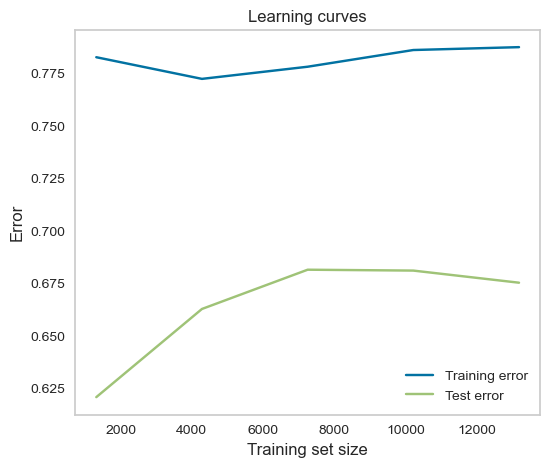

In [33]:
KNNregressor = KNeighborsRegressor(n_neighbors=5) 
KRegmodel = KNNregressor.fit(X_train, y_train)
KRegpreds = KRegmodel.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, KRegpreds)
print("Mean Squared Error:", mse)

# Calculate and print R-squared on the training set
r_sq_lin = KRegmodel.score(X_train, y_train) * 100
print("R-squared:", r_sq_lin, "%")

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(KNNregressor, X_train, y_train, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

The train error is significantly higher than the testing error and the testing error plateaus while the train error remains high, it suggests that the model is overfitting to the training data. 

#### KNN Regressor with original dataset

Mean Squared Error: 3.1624018478879116e+16
R-squared: 62.95254508951926 %


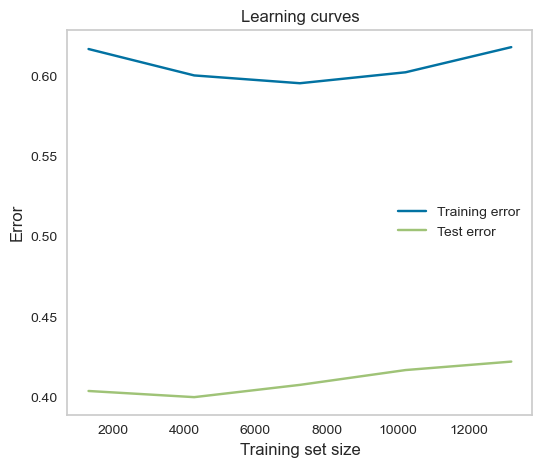

In [34]:
KNNregressor = KNeighborsRegressor(n_neighbors=5) 
KRegmodel = KNNregressor.fit(X_train1, y_train1)
KRegpreds = KRegmodel.predict(X_test1)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test1, KRegpreds)
print("Mean Squared Error:", mse)

# Calculate and print R-squared on the training set
r_sq_lin = KRegmodel.score(X_train1, y_train1) * 100
print("R-squared:", r_sq_lin, "%")

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(KNNregressor, X_train1, y_train1, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

#### Ridge Regression with reduced dataset (PCA)

Mean Squared Error: 2.775130853229926e+16
R-squared: 55.053516002610806 %


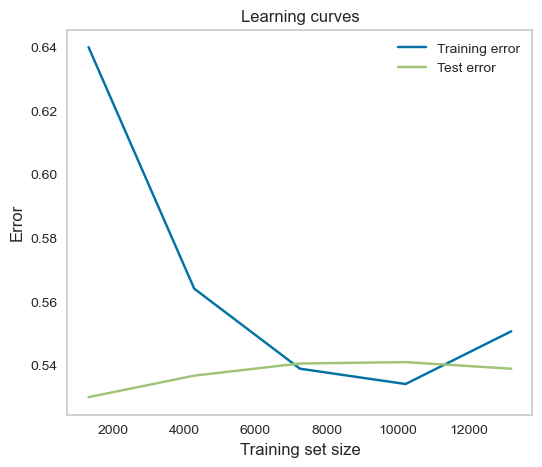

In [35]:
RIDGEregressor = Ridge(alpha=100)
RIDGERegmodel = RIDGEregressor.fit(X_train, y_train)
RIDGERegpreds = RIDGERegmodel.predict(X_test)

mse = mean_squared_error(y_test, RIDGERegpreds)  
print("Mean Squared Error:", mse)

r_sq_rr = RIDGERegmodel.score(X_train, y_train) * 100
print("R-squared:", r_sq_rr, "%")


train_sizes, train_scores, test_scores = learning_curve(RIDGEregressor, X_train, y_train, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

The training error decreases initially but then starts to increase, and at the same time, the test error also increases, it may indicate that the model is overfitting the training data.

#### Ridge Regression with original dataset



Mean Squared Error: 3.0184535228481548e+16
R-squared: 52.220132814612164 %


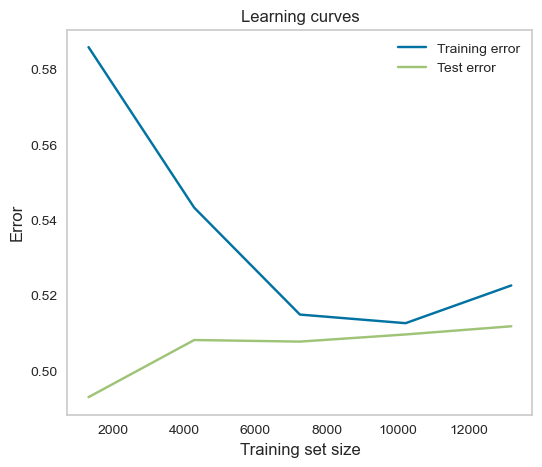

In [46]:
RIDGEregressor = Ridge(alpha=100)
RIDGERegmodel = RIDGEregressor.fit(X_train1, y_train1)
RIDGERegpreds = RIDGERegmodel.predict(X_test1)

mse = mean_squared_error(y_test1, RIDGERegpreds)  
print("Mean Squared Error:", mse)

r_sq_rr = RIDGERegmodel.score(X_train1, y_train1) * 100
print("R-squared:", r_sq_rr, "%")


train_sizes, train_scores, test_scores = learning_curve(RIDGEregressor, X_train1, y_train1, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

The training error decreases initially but then starts to increase, and at the same time, the test error also increases, it may indicate that the model is overfitting the training data.

#### Random forest with PCA data

C:\Users\Ameyaveer Singh\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


Mean Squared Error: 1.9961337388341292e+16
R-squared: 64.08880646275874 %


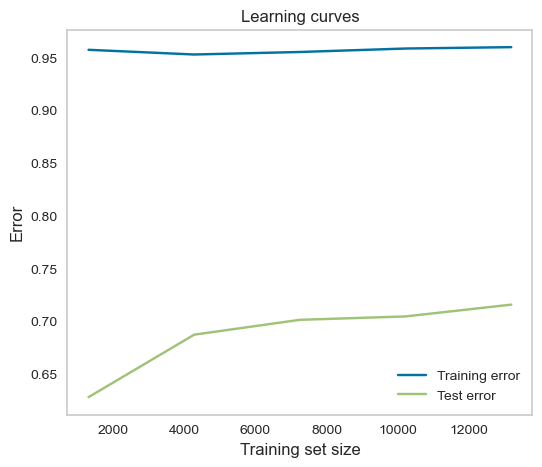

In [47]:
from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23, oob_score=True)
RFmodel = RFregressor.fit(X_train, y_train)
RFpreds = RFmodel.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, RFpreds)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test1, RFpreds)
r2_percentage = r2 * 100
print("R-squared:", r2_percentage,"%")

estimator = RandomForestRegressor()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()


warnings.simplefilter(action='ignore', category=FutureWarning)

The train error is significantly higher than the testing error and the testing error plateaus while the train error remains high, it suggests that the model is overfitting to the training data.

#### Random Foreset with original data

C:\Users\Ameyaveer Singh\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


Mean Squared Error: 1.9751852038532388e+16
R-squared: 64.46567845253826 %


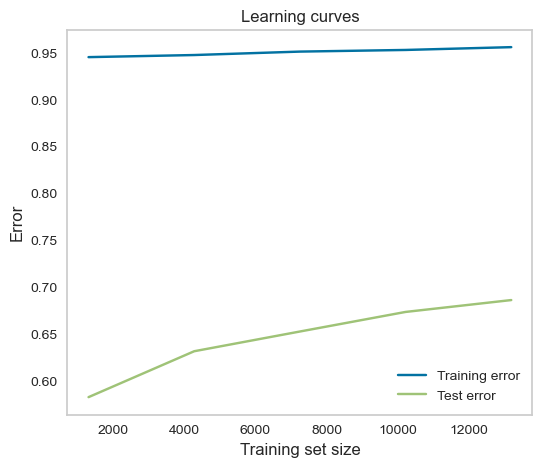

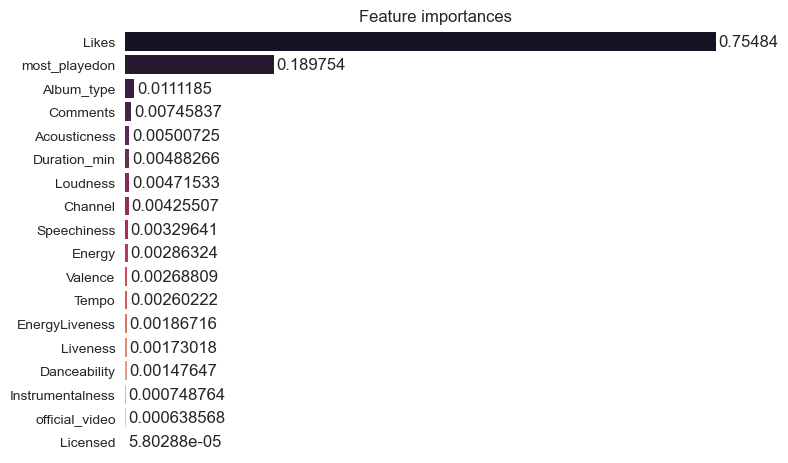

In [26]:
from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23, oob_score=True)
RFmodel = RFregressor.fit(X_train1, y_train1)
RFpreds = RFmodel.predict(X_test1)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test1, RFpreds)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test1, RFpreds)
r2_percentage = r2 * 100
print("R-squared:", r2_percentage,"%")

estimator = RandomForestRegressor()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train1, y_train1, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()


warnings.simplefilter(action='ignore', category=FutureWarning)


features_df = pd.DataFrame({'features': RFmodel.feature_names_in_, 'importances': RFmodel.feature_importances_ })
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

The train error is significantly higher than the testing error and the testing error plateaus while the train error remains high, it suggests that the model is overfitting to the training data.

#### Elastic Net Regressor with reduced dataset (PCA)

Intercept: 132934442.41580456
Coefficients: [46470595.54453634 66942486.62215525 30112008.71428141]
Mean Squared Error: 2.726258595724797e+16
R-squared: 52.69800715273985 %


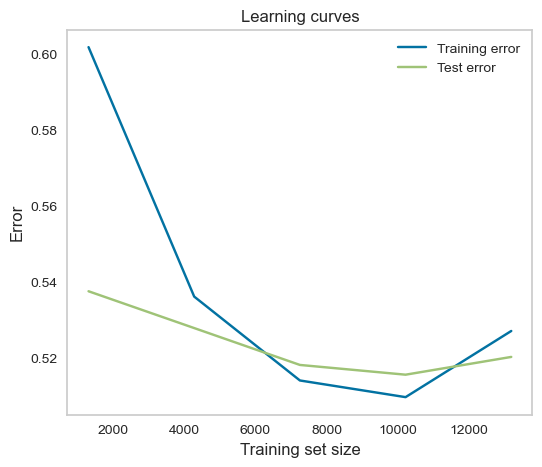

In [36]:
ENregressor = ElasticNet(alpha=1, l1_ratio=0.3)
ENRegmodel = ENregressor.fit(X_train, y_train)
ENRegpreds = ENRegmodel.predict(X_test)

print("Intercept:", ENRegmodel.intercept_)
print("Coefficients:", ENRegmodel.coef_)

mse = mean_squared_error(y_test, ENRegpreds)  
print("Mean Squared Error:", mse)

r_sq_rr = ENRegmodel.score(X_train, y_train) * 100
print("R-squared:", r_sq_rr, "%")


train_sizes, train_scores, test_scores = learning_curve(ENregressor, X_train, y_train, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

The training error decreases and then starts to increase while the test error decreases indicating an overfit of the data.

#### Elastic Net Regressor with original dataset

Intercept: 129557568.86570401
Coefficients: [-1.45113556e+07 -1.90773069e+05 -1.61148401e+06  2.63091138e+06
 -1.00392833e+06 -2.88824966e+06 -1.11917011e+06 -1.46146513e+06
 -2.60259471e+06 -5.77533516e+04 -1.79382219e+06 -2.29284993e+03
  1.15809284e+02 -4.54659207e+02  7.58449828e+04  4.03804610e+05
 -4.19945513e+05 -2.60780162e+07]
Mean Squared Error: 3.2314387155861052e+16
R-squared: 48.34050469668016 %


C:\Users\Ameyaveer Singh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.820e+18, tolerance: 7.845e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ameyaveer Singh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+18, tolerance: 5.902e+16
  model = cd_fast.enet_coordinate_descent(


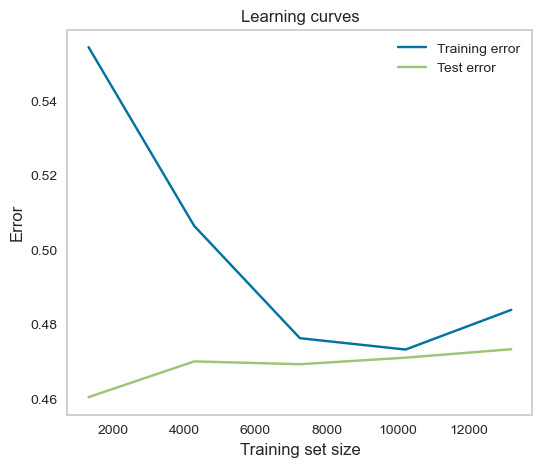

In [28]:
ENregressor = ElasticNet(alpha=1, l1_ratio=0.3)
ENRegmodel = ENregressor.fit(X_train1, y_train1)
ENRegpreds = ENRegmodel.predict(X_test1)

print("Intercept:", ENRegmodel.intercept_)
print("Coefficients:", ENRegmodel.coef_)

mse = mean_squared_error(y_test1, ENRegpreds)  
print("Mean Squared Error:", mse)

r_sq_rr = ENRegmodel.score(X_train1, y_train1) * 100
print("R-squared:", r_sq_rr, "%")


train_sizes, train_scores, test_scores = learning_curve(ENregressor, X_train1, y_train1, cv=5)

# Calculate mean scores across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('Error')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
plt.grid(False) 
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

#### ANN

Sequential(
  (0): Linear(in_features=15, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=1, bias=True)
)
0.weight: torch.Size([128, 15])
0.bias: torch.Size([128])
2.weight: torch.Size([64, 128])
2.bias: torch.Size([64])
4.weight: torch.Size([32, 64])
4.bias: torch.Size([32])
6.weight: torch.Size([16, 32])
6.bias: torch.Size([16])
8.weight: torch.Size([8, 16])
8.bias: torch.Size([8])
10.weight: torch.Size([1, 8])
10.bias: torch.Size([1])
Finished epoch 0, latest loss 5.813148470319514e+16, training R-squared 1.03%
Finished epoch 1, latest loss 5.760811716837376e+16, training R-squared 1.92%
Finished epoch 2, latest loss 5.709187068932915e+16, training R-squared 2.80

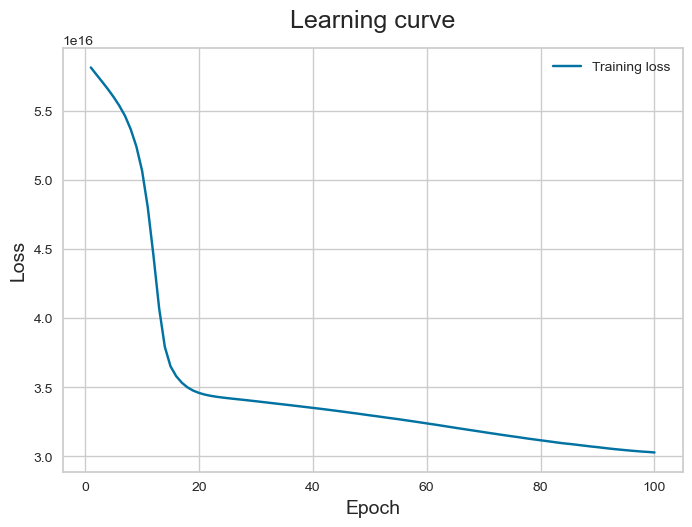

In [47]:
X = torch.tensor(reco_norm, dtype=torch.float32)
y = torch.tensor(reco_labels_1.values, dtype=torch.float32).reshape(-1, 1)

model = nn.Sequential(
    nn.Linear(X.shape[1], 128), 
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
)

print(model)
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data.shape}')

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

model.apply(init_weights)

loss_fn = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 10

def r_squared(y_true, y_pred):
    ss_total = torch.sum((y_true - torch.mean(y_true))**2)
    ss_residual = torch.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2.item()

train_losses = []
train_r2_scores = []

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i + batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i + batch_size]

        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        y_pred_train = model(X)
        mse = loss_fn(y_pred_train, y)
    
        r2 = r_squared(y, y_pred_train)
        train_r2_scores.append(r2)

    train_losses.append(mse.item())

    r2_percentage = r2 * 100
    print(f'Finished epoch {epoch}, latest loss {mse.item()}, training R-squared {r2_percentage:.2f}%')


# Plot learning curve
plt.plot(range(1, n_epochs + 1), train_losses, label='Training loss')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.title('Learning curve', fontsize=18, y=1.03)
plt.legend()
plt.show()


A smoothly decreasing training loss curve is a positive indication that suggests that the model is successfully learning and adapting to the patterns in the training data as the epochs progress. However,  the R-squared is relatively low at 48%, it indicates that the model explains only 48% of the variance in the target variable. 

The ANN model showed little improvements after increasing the number of layers past 6 and epochs past 100. 

#### Accuracy comparison for all models

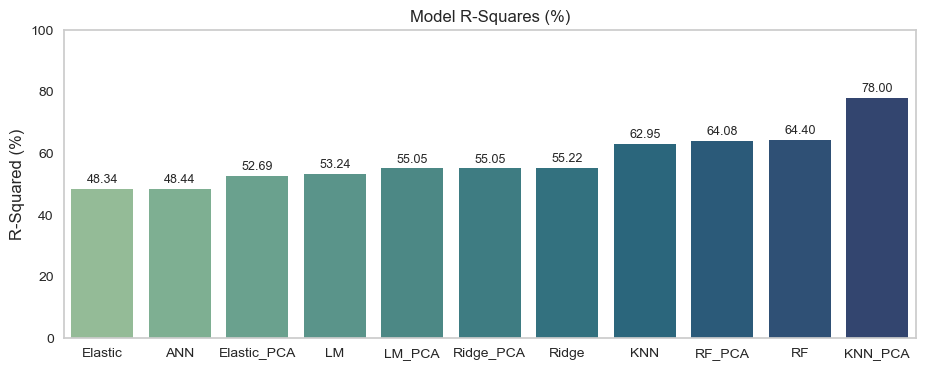

In [68]:
model_names = ["LM_PCA", "LM", "KNN_PCA", "KNN", "Ridge_PCA", "Ridge", "RF_PCA", "RF", "Elastic_PCA", "Elastic", "ANN"]

accuracies = [55.05, 53.24, 78, 62.95, 55.05, 55.22, 64.08, 64.4, 52.69, 48.34, 48.44]

sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k])
model_names_sorted = [model_names[i] for i in sorted_indices]
accuracies_sorted = [accuracies[i] for i in sorted_indices]

plt.figure(figsize=(11, 4))
bars = sns.barplot(x=model_names_sorted, y=accuracies_sorted,  palette="crest")

plt.ylabel('R-Squared (%)')
plt.title('Model R-Squares (%)')

for i, acc in enumerate(accuracies_sorted):
    plt.text(i, acc + 1, f'{acc:.2f}', ha='center', va='bottom', fontsize=9)

plt.ylim(0, 100)
plt.grid(False)
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

#### Accuracy comparison for PCA models and normal models

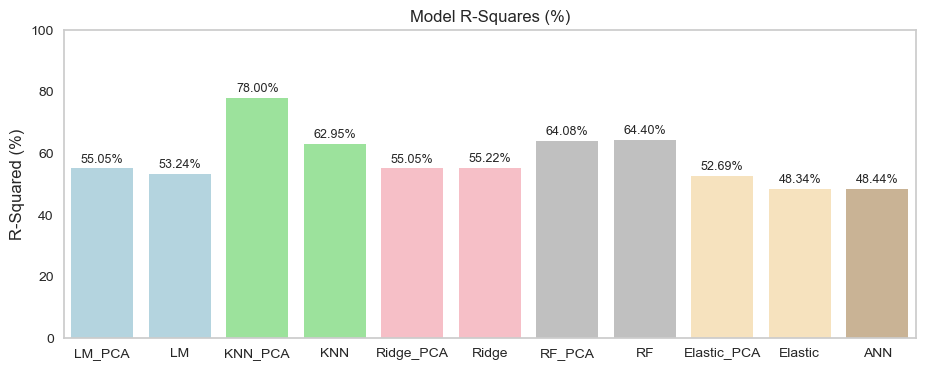

In [69]:
model_names = ["LM_PCA", "LM", "KNN_PCA", "KNN", "Ridge_PCA", "Ridge", "RF_PCA", "RF", "Elastic_PCA", "Elastic", "ANN"]
accuracies = [55.05, 53.24, 78, 62.95, 55.05, 55.22, 64.08, 64.4, 52.69, 48.34, 48.44]

pair_colors = {
    "LM_PCA": "#add8e6",  # Light Blue
    "LM": "#add8e6",      # Light Blue
    "KNN_PCA": "#90ee90",  # Light Green
    "KNN": "#90ee90",      # Light Green
    "Ridge_PCA": "#ffb6c1",  # Light Pink
    "Ridge": "#ffb6c1",      # Light Pink
    "RF_PCA": "#c0c0c0",   # Silver
    "RF": "#c0c0c0",       # Silver
    "Elastic_PCA": "#ffe4b5",  # Moccasin
    "Elastic": "#ffe4b5",      # Moccasin
    "ANN": "#d2b48c",      # Tan
}

# Create a bar chart with paired colors
plt.figure(figsize=(11, 4))
bars = sns.barplot(x=model_names, y=accuracies, palette=[pair_colors[model] for model in model_names])

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy:.2f}%', ha='center', va='bottom',fontsize=9)

plt.ylabel('R-Squared (%)')
plt.title('Model R-Squares (%)')
plt.ylim(0, 100)
plt.grid(False)
plt.show()
warnings.simplefilter(action='ignore', category=FutureWarning)
